In [1]:
import re

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_scores(scores):
    n = len(scores)
    l30 = np.ones(n) * 30
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, n + 1), scores, '-r', label='score')
    plt.plot(np.arange(1, n + 1), np.ones(n) * 0.5, '-g', label='0.5')
    plt.plot(np.arange(1, n + 1), np.ones(n) * scores.mean(), '-b', label='mean')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()
    
def load_logs(filename, mode=0):
    scores = []
    line_re = re.compile(r'^Scored: (\d\.\d+) (\d\.\d+)$')
    with open(filename) as fd:
        while True:
            line = fd.readline()
            if not line:
                break
            m = line_re.match(line)
            if m:
                if mode == 1:
                    s = float(m.group(1))
                elif mode == 2:
                    s = float(m.group(2))
                else:
                    s = max(float(m.group(1)), float(m.group(2)))
                scores.append(s)
    return np.array(scores)

# Training of TD3

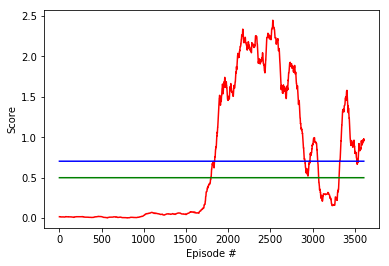

In [3]:
r1 = np.load('./rewards/TD3_Tennis_12.npy')
plot_scores(np.array([sum(r1[x-100:x]) / 100 for x in range(100, len(r1))]))

# Test run of trained TD3

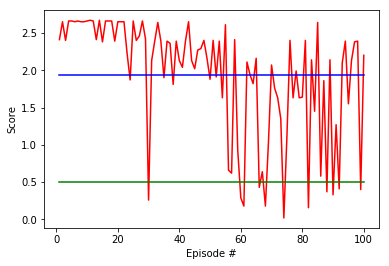

In [4]:
r3 = np.load('./results/TD3_Tennis_12.npy')
plot_scores(r3[-100:])

2.32


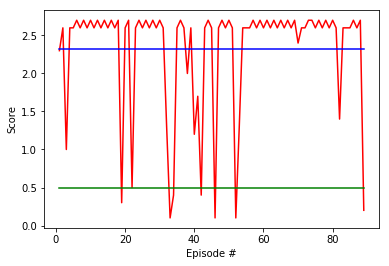

In [5]:
s1 = load_logs('./logs/td3_play.log')
print('{:.02f}'.format(s1.mean()))
plot_scores(s1)

# Training of DDPG

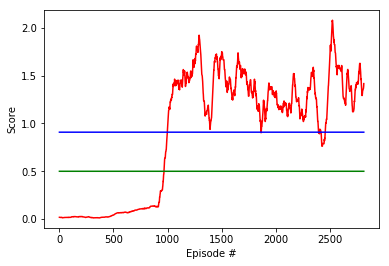

In [6]:
r2 = np.load('./rewards/mDDPG_Tennis_12.npy')
plot_scores(np.array([sum(r2[x-100:x]) / 100 for x in range(100, len(r2))]))

# Test run of trained DDPG

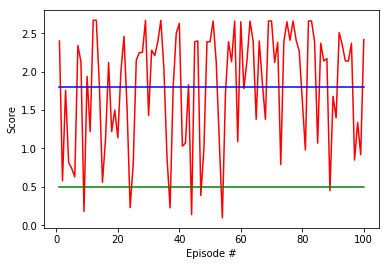

In [7]:
r4 = np.load('./results/mDDPG_Tennis_12.npy')
plot_scores(r4[-100:])

2.39


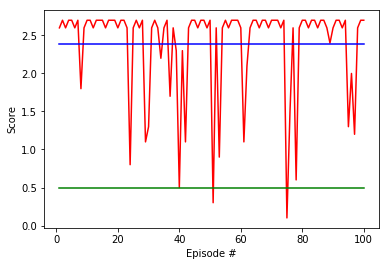

In [8]:
s1 = load_logs('./logs/ddpg_play.log')
print('{:.02f}'.format(s1.mean()))
plot_scores(s1)

# Test run of mixed DDPG vs TD3 agents

1.99


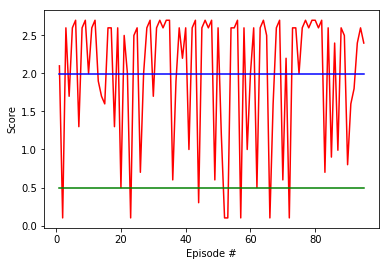

In [9]:
s1 = load_logs('./logs/mixed_play_02.log')
print('{:.02f}'.format(s1.mean()))
plot_scores(s1)